In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#from sklearn.model_selection import train_test_split

In [2]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names is None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst, key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [3]:
def load_data():
    boston = load_boston()
    print (boston.DESCR)
    X = boston["data"]
    Y = boston["target"]
    names = boston["feature_names"]
    return X,Y,names

In [4]:
def scale_data(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

In [5]:
def split_data(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    return X_train, X_test, Y_train, Y_test

In [6]:
def root_mean_square_error(y_pred,y_test):
    rmse_train = np.sqrt(np.dot(abs(y_pred-y_test),abs(y_pred-y_test))/len(y_test))
    return rmse_train

In [7]:
def plot_real_vs_predicted(y_pred,y_test):
    plt.plot(y_pred,y_test,'ro')
    plt.plot([0,50],[0,50], 'g-')
    plt.xlabel('predicted')
    plt.ylabel('real')
    plt.show()
    return plt

In [8]:
def generate_regression_values(model, X, y):
    params = np.append(model.intercept_, model.coef_)
    predictions = model.predict(X)
    newX = pd.DataFrame({"Constant": np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y - predictions) ** 2)) / (len(newX) - len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - 1))) for i in ts_b]

    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    params = np.round(params, 4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"], myDF3["Standard Errors"], myDF3["t values"], myDF3[
        "Probabilites"
    ] = [params, sd_b, ts_b, p_values]
    print(myDF3)


In [9]:
X,Y,names = load_data()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
np.set_printoptions(precision=2, linewidth=100, suppress=True, edgeitems=2)

In [11]:
X[0:5]

array([[  0.01,  18.  ,   2.31,   0.  ,   0.54,   6.58,  65.2 ,   4.09,   1.  , 296.  ,  15.3 ,
        396.9 ,   4.98],
       [  0.03,   0.  ,   7.07,   0.  ,   0.47,   6.42,  78.9 ,   4.97,   2.  , 242.  ,  17.8 ,
        396.9 ,   9.14],
       [  0.03,   0.  ,   7.07,   0.  ,   0.47,   7.18,  61.1 ,   4.97,   2.  , 242.  ,  17.8 ,
        392.83,   4.03],
       [  0.03,   0.  ,   2.18,   0.  ,   0.46,   7.  ,  45.8 ,   6.06,   3.  , 222.  ,  18.7 ,
        394.63,   2.94],
       [  0.07,   0.  ,   2.18,   0.  ,   0.46,   7.15,  54.2 ,   6.06,   3.  , 222.  ,  18.7 ,
        396.9 ,   5.33]])

In [12]:
X = scale_data(X)

In [13]:
X_train, X_test, Y_train, Y_test = split_data(X,Y)

# Let's try Linear Regression:

Linear model:  -3.906 * LSTAT + -2.992 * DIS + 2.739 * RM + 2.043 * RAD + -2.009 * PTRATIO + -1.872 * NOX + -1.383 * TAX + -1.106 * CRIM + 1.073 * B + 0.881 * ZN + 0.822 * CHAS + 0.399 * INDUS + -0.361 * AGE
Root Mean Square Error: 4.552364598463066


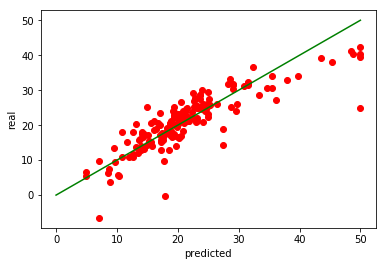

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [14]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

print ("Linear model: ", pretty_print_linear(linreg.coef_, names, sort = True))

# Predict the values using the model
Y_lin_predict = linreg.predict(X_test)

# Print the root mean square error 
print ("Root Mean Square Error: {}".format(root_mean_square_error(Y_lin_predict,Y_test)))
plot_real_vs_predicted(Y_test,Y_lin_predict)

In [15]:
generate_regression_values(linreg, X_test, Y_test)

    Coefficients  Standard Errors  t values  Probabilites
0        22.4660            0.383    58.584         0.000
1        -1.1064            0.431    -2.570         0.011
2         0.8813            0.534     1.649         0.101
3         0.3990            0.856     0.466         0.642
4         0.8218            0.449     1.830         0.069
5        -1.8719            0.776    -2.413         0.017
6         2.7389            0.570     4.809         0.000
7        -0.3614            0.705    -0.513         0.609
8        -2.9918            0.770    -3.885         0.000
9         2.0429            1.025     1.993         0.048
10       -1.3829            1.170    -1.182         0.239
11       -2.0086            0.572    -3.511         0.001
12        1.0734            0.438     2.451         0.015
13       -3.9063            0.783    -4.990         0.000


# Let's try Lasso Regression:

Lasso model:  -4.01 * LSTAT + 2.858 * RM + -1.611 * PTRATIO + -0.91 * DIS + 0.802 * B + 0.736 * CHAS + -0.423 * NOX + -0.296 * CRIM + 0.0 * ZN + -0.0 * INDUS + -0.0 * AGE + 0.0 * RAD + -0.0 * TAX
Root Mean Square Error:  4.845345289310666


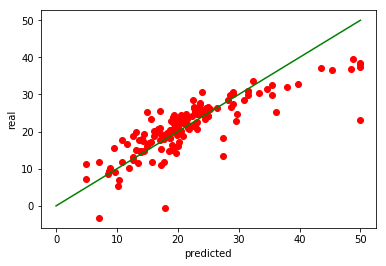

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [16]:
# Create lasso regression object
lasso = Lasso(alpha=.3)

# Train the model using the training sets
lasso.fit(X_train, Y_train) 

print ("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))

# Predict the values using the model
Y_lasso_predict = lasso.predict(X_test)

# Print the root mean square error 
print ("Root Mean Square Error: ", root_mean_square_error(Y_lasso_predict,Y_test))
plot_real_vs_predicted(Y_test,Y_lasso_predict)

In [17]:
generate_regression_values(lasso, X_test, Y_test)

    Coefficients  Standard Errors  t values  Probabilites
0        22.5150            0.408    55.162         0.000
1        -0.2961            0.458    -0.646         0.519
2         0.0000            0.569     0.000         1.000
3        -0.0000            0.911    -0.000         1.000
4         0.7361            0.478     1.540         0.125
5        -0.4230            0.826    -0.512         0.609
6         2.8582            0.606     4.715         0.000
7        -0.0000            0.750    -0.000         1.000
8        -0.9101            0.820    -1.110         0.268
9         0.0000            1.091     0.000         1.000
10       -0.0000            1.245    -0.000         1.000
11       -1.6107            0.609    -2.645         0.009
12        0.8023            0.466     1.721         0.087
13       -4.0096            0.833    -4.813         0.000


# Let's try Ridge Regression:

Ridge model:  -3.902 * LSTAT + -2.979 * DIS + 2.741 * RM + 2.017 * RAD + -2.005 * PTRATIO + -1.86 * NOX + -1.361 * TAX + -1.101 * CRIM + 1.073 * B + 0.874 * ZN + 0.824 * CHAS + 0.39 * INDUS + -0.362 * AGE
Root Mean Square Error:  4.553273945771453


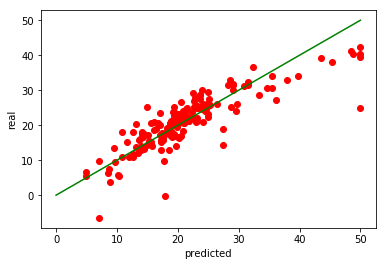

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [18]:
ridge = Ridge(fit_intercept=True, alpha=.3)
              
# Train the model using the training sets
ridge.fit(X_train, Y_train) 

print ("Ridge model: ", pretty_print_linear(ridge.coef_, names, sort = True))

# Predict the values using the model
Y_ridge_predict = ridge.predict(X_test)

# Print the root mean square error 
print ("Root Mean Square Error: ", root_mean_square_error(Y_ridge_predict,Y_test))
plot_real_vs_predicted(Y_test,Y_ridge_predict)

In [19]:
generate_regression_values(ridge, X_test, Y_test)

    Coefficients  Standard Errors  t values  Probabilites
0        22.4663            0.384    58.573         0.000
1        -1.1014            0.431    -2.558         0.011
2         0.8743            0.535     1.636         0.104
3         0.3900            0.856     0.456         0.649
4         0.8235            0.449     1.834         0.068
5        -1.8605            0.776    -2.398         0.018
6         2.7413            0.570     4.812         0.000
7        -0.3622            0.705    -0.514         0.608
8        -2.9790            0.770    -3.867         0.000
9         2.0169            1.025     1.968         0.051
10       -1.3605            1.170    -1.163         0.246
11       -2.0051            0.572    -3.504         0.001
12        1.0726            0.438     2.448         0.015
13       -3.9017            0.783    -4.984         0.000


# Now let's try to do regression via Elastic Net.

Elastic Net model:  -3.337 * LSTAT + 2.801 * RM + -1.574 * PTRATIO + -1.142 * DIS + 0.851 * CHAS + 0.845 * B + -0.701 * NOX + -0.513 * CRIM + 0.196 * ZN + -0.163 * AGE + -0.052 * TAX + -0.039 * INDUS + 0.0 * RAD
Root Mean Square Error:  4.810461359302996


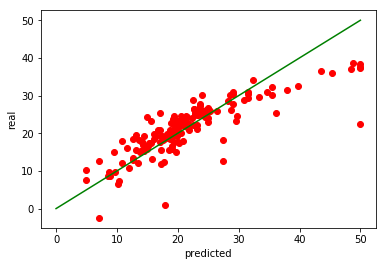

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [20]:
elnet = ElasticNet(fit_intercept=True, alpha=.3)
              
# Train the model using the training sets
elnet.fit(X_train, Y_train) 

print ("Elastic Net model: ", pretty_print_linear(elnet.coef_, names, sort = True))

# Predict the values using the model
Y_elnet_predict = elnet.predict(X_test)

# Print the root mean square error 
print ("Root Mean Square Error: ", root_mean_square_error(Y_elnet_predict,Y_test))
plot_real_vs_predicted(Y_test,Y_elnet_predict)

# Now let's try to do regression via Stochastic Gradient Descent.

Stochastic Gradient Descent model:  -3.33 * LSTAT + 2.788 * RM + -1.793 * DIS + -1.677 * PTRATIO + -0.981 * NOX + 0.959 * B + 0.927 * CHAS + -0.758 * CRIM + 0.595 * RAD + 0.454 * ZN + -0.432 * TAX + -0.363 * AGE + -0.111 * INDUS
Root Mean Square Error:  4.679374006096742


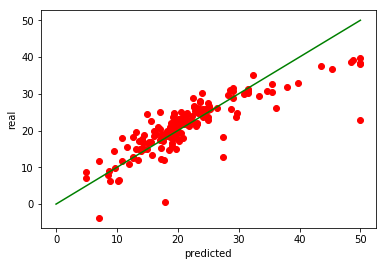

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [21]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Train the model using the training sets
sgdreg.fit(X_train, Y_train) 

print ("Stochastic Gradient Descent model: ", pretty_print_linear(sgdreg.coef_, names, sort = True))

# Predict the values using the model
Y_sgdreg_predict = sgdreg.predict(X_test)

# Print the root mean square error 
print ("Root Mean Square Error: ", root_mean_square_error(Y_sgdreg_predict,Y_test))
plot_real_vs_predicted(Y_test,Y_sgdreg_predict)